In [24]:
"""
["radius-of-interaction" [1.5 2 5.5]]
["movement-steps" [1 2 5]]
["percentage-unhappy" [10 10 40]]


( sum [ state ] of turtles with [ breed = clients ] ) /  (( 1 - frac-providers) * N-turtles)
( sum [ state ] of turtles with [ breed = service-providers ] ) /  ( frac-providers * N-turtles )
mean [nw:clustering-coefficient] of turtles
paths
mean [nw:closeness-centrality] of turtles
mean [nw:betweenness-centrality] of turtles"""



'\n["radius-of-interaction" [1.5 2 5.5]]\n["movement-steps" [1 2 5]]\n["percentage-unhappy" [10 10 40]]\n\n\n( sum [ state ] of turtles with [ breed = clients ] ) /  (( 1 - frac-providers) * N-turtles)\n( sum [ state ] of turtles with [ breed = service-providers ] ) /  ( frac-providers * N-turtles )\nmean [nw:clustering-coefficient] of turtles\npaths\nmean [nw:closeness-centrality] of turtles\nmean [nw:betweenness-centrality] of turtles'

In [25]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import matplotlib as mpl

df=pd.read_csv("/home/theone/Downloads/NetLogo/My-code/CA_5-STATES_NETWORK_CLEAN_55_PERFEITO_SAVE_Block_Arduino_25_PERFECT_DOC_BREED_aligned_BEHAVIOR_work2_SIMILARITY_SEGREGATION_CENTROIDE_work experiment_centroid-table.csv",sep=',', header = 6)

df.shape

#df2=df[(df['radius-of-interaction']==1.5) & (df['movement-steps']==3) & (df['percentage-unhappy']==20)]

df3=df.iloc[:,0:]

df3.columns

Index(['[run number]', 'radius-of-interaction', 'movement-steps',
       'load-graphml', 'N-turtles', 'percentage-unhappy',
       'clear-before-generating', 'arduino-on', 'mutated', 'links-to-use',
       'frac-providers', '[step]',
       '( sum [ state ] of turtles with [ breed = clients ] ) /  (( 1 - frac-providers) * N-turtles)',
       '( sum [ state ] of turtles with [ breed = service-providers ] ) /  ( frac-providers * N-turtles )',
       'mean [nw:clustering-coefficient] of turtles', 'paths',
       'mean [nw:closeness-centrality] of turtles',
       'mean [nw:betweenness-centrality] of turtles', 'centroid-x',
       'centroid-y'],
      dtype='object')

In [26]:
df3.columns=['run_number', 'radius-of-interaction', 'movement-steps',
       'load-graphml', 'N-turtles', 'percentage-unhappy',
       'clear-before-generating', 'arduino-on', 'mutated', 'links-to-use',
       'frac-providers', 'step', 'mood_clients', 'mood_providers',
       'cluster_coef', 'paths', 'closeness', 'betweenness','centroid-x','centroid-y']
df4=df3[(df3.betweenness<500) & (df3.closeness<10) & (df3.cluster_coef<10)]

df4=df4[['run_number', 'radius-of-interaction', 'movement-steps',
       'percentage-unhappy',
       'frac-providers', 'step', 'mood_clients', 'mood_providers',
       'cluster_coef', 'paths', 'closeness', 'betweenness','centroid-x','centroid-y']]
df4.paths[df4.paths=='false']=0
df4.paths=df4.paths.astype(float)
df4

,run_number,radius-of-interaction,movement-steps,percentage-unhappy,frac-providers,step,mood_clients,mood_providers,cluster_coef,paths,closeness,betweenness,centroid-x,centroid-y
0,1,1.5,1,10,0.05,0,2.6316,2.2500,0.0958,0.0000,0.3983,0.0750,0.0000,0.0000
1,3,1.5,1,10,0.15,0,2.8088,2.5833,0.0000,0.0000,0.3042,0.0125,0.0000,0.0000
2,5,1.5,1,20,0.05,0,2.7632,1.5000,0.0375,0.0000,0.2625,0.0000,0.0000,0.0000
3,7,1.5,1,30,0.05,0,2.1842,3.2500,0.0750,0.0000,0.3430,0.1875,0.0000,0.0000
4,2,1.5,1,10,0.05,0,2.7237,1.5000,0.0375,0.0000,0.3167,0.0125,0.0000,0.0000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9823,105,5.5,5,30,0.15,86,2.1912,3.8333,0.7368,1.6462,0.6169,25.5250,-0.3339,-0.5045
9824,105,5.5,5,30,0.15,87,2.1176,4.3333,0.7355,1.6430,0.6182,25.4000,-0.1464,-0.6170
9825,105,5.5,5,30,0.15,88,2.2206,2.9167,0.7366,1.6411,0.6190,25.3250,-0.0214,-0.3920
9826,105,5.5,5,30,0.15,89,2.0735,4.0833,0.7362,1.6396,0.6197,25.2625,-0.2464,-0.5295


In [27]:
df_move=df4.groupby(['radius-of-interaction','step']).agg({'mood_clients':np.mean,'mood_providers':np.mean,
       'cluster_coef':np.mean, 'paths':np.mean, 'closeness':np.mean, 'betweenness':np.mean,'centroid-x':np.mean,'centroid-y':np.mean})
df_move

mood_clients  mood_providers  cluster_coef  \
radius-of-interaction step                                               
1.5                   0           2.3546          2.4398        0.0361   
                      1           1.7362          3.1042        0.0503   
                      2           2.1245          3.4144        0.0605   
                      3           2.0676          3.8912        0.0694   
                      4           2.1519          2.5162        0.0814   
...                                  ...             ...           ...   
5.5                   86          2.1810          3.6389        0.7068   
                      87          2.0460          3.8796        0.7069   
                      88          2.1638          2.6921        0.7071   
                      89          1.8971          3.2870        0.7073   
                      90          2.3059          3.6921        0.7080   

                             paths  closeness  betweenness  centroid-x  \
radius-of-interaction step                                               
1.5                   0     0.0000     0.2845       0.0604      0.0000   
                      1     0.0000     0.2982       0.1260      0.1701   
                      2     0.0000     0.3496       0.1806      0.1797   
                      3     0.0000     0.3577       0.4042      0.2037   
                      4     0.0000     0.3680       0.5851      0.2214   
...                            ...        ...          ...         ...   
5.5                   86    1.7056     0.5124      42.4260     -0.0690   
                      87    1.7016     0.5135      42.2639     -0.0458   
                      88    1.6991     0.5142      42.1573     -0.0267   
                      89    1.6957     0.5152      42.0201     -0.0076   
                      90    1.6933     0.5161      41.8542      0.0199   

                            centroid-y  
radius-of-interaction step              
1.5                   0         0.0000  
                      1         0.2945  
                      2         0.2875  
                      3         0.2917  
                      4         0.3004  
...                                ...  
5.5                   86       -0.0843  
                      87       -0.0773  
                      88       -0.0610  
                      89       -0.0756  
                      90       -0.0693  

[273 rows x 8 columns]

In [28]:
df_move['total_mood']=df_move.mood_clients+df_move.mood_providers

In [29]:
df_move

mood_clients  mood_providers  cluster_coef  \
radius-of-interaction step                                               
1.5                   0           2.3546          2.4398        0.0361   
                      1           1.7362          3.1042        0.0503   
                      2           2.1245          3.4144        0.0605   
                      3           2.0676          3.8912        0.0694   
                      4           2.1519          2.5162        0.0814   
...                                  ...             ...           ...   
5.5                   86          2.1810          3.6389        0.7068   
                      87          2.0460          3.8796        0.7069   
                      88          2.1638          2.6921        0.7071   
                      89          1.8971          3.2870        0.7073   
                      90          2.3059          3.6921        0.7080   

                             paths  closeness  betweenness  centroid-x  \
radius-of-interaction step                                               
1.5                   0     0.0000     0.2845       0.0604      0.0000   
                      1     0.0000     0.2982       0.1260      0.1701   
                      2     0.0000     0.3496       0.1806      0.1797   
                      3     0.0000     0.3577       0.4042      0.2037   
                      4     0.0000     0.3680       0.5851      0.2214   
...                            ...        ...          ...         ...   
5.5                   86    1.7056     0.5124      42.4260     -0.0690   
                      87    1.7016     0.5135      42.2639     -0.0458   
                      88    1.6991     0.5142      42.1573     -0.0267   
                      89    1.6957     0.5152      42.0201     -0.0076   
                      90    1.6933     0.5161      41.8542      0.0199   

                            centroid-y  total_mood  
radius-of-interaction step                          
1.5                   0         0.0000      4.7944  
                      1         0.2945      4.8404  
                      2         0.2875      5.5389  
                      3         0.2917      5.9588  
                      4         0.3004      4.6681  
...                                ...         ...  
5.5                   86       -0.0843      5.8199  
                      87       -0.0773      5.9257  
                      88       -0.0610      4.8560  
                      89       -0.0756      5.1841  
                      90       -0.0693      5.9981  

[273 rows x 9 columns]

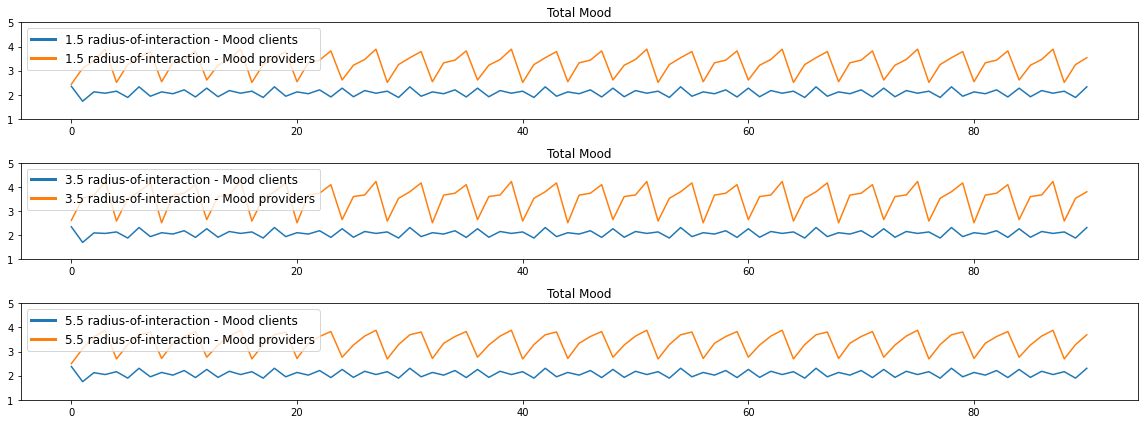

In [30]:
fig, ax = plt.subplots(ncols=1, nrows=3,figsize=(16, 6),gridspec_kw={'height_ratios': [3, 3,3]})
x=0
for i in [1.5,3.5,5.5]:
    x=x+1
    plt.subplot(310+x)
    plt.plot(np.arange(0, df_move.reset_index().loc[df_move.reset_index()['radius-of-interaction']==i].shape[0]),
    df_move.reset_index().loc[df_move.reset_index()['radius-of-interaction']==i]['mood_clients'], label='{} radius-of-interaction - Mood clients'.format(i))
    plt.plot(np.arange(0, df_move.reset_index().loc[df_move.reset_index()['radius-of-interaction']==i].shape[0]),
    df_move.reset_index().loc[df_move.reset_index()['radius-of-interaction']==i]['mood_providers'], label='{} radius-of-interaction - Mood providers'.format(i))
    leg=plt.legend(fontsize=12,loc = "upper left")
    plt.title("Total Mood")
    for line in leg.get_lines():
        line.set_linewidth(3.0)
    fig.tight_layout()
    plt.ylim(1,5)
plt.show()



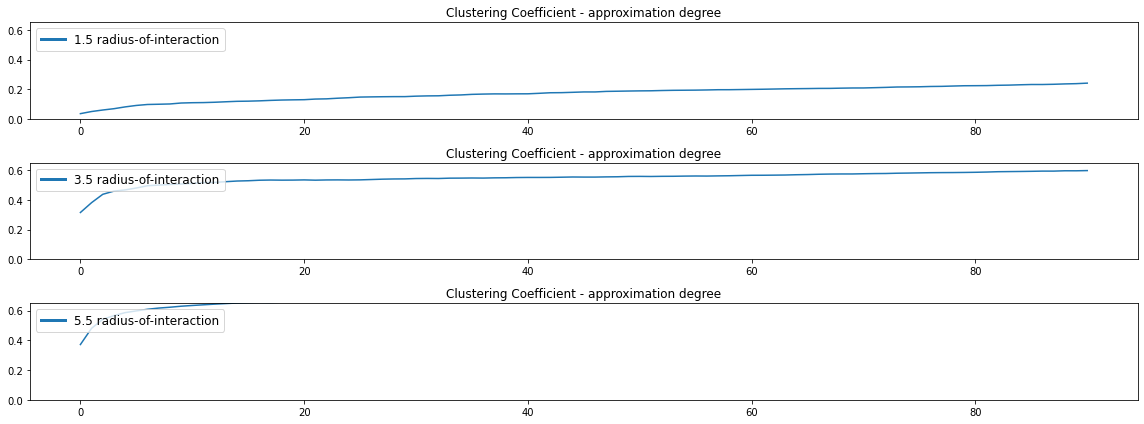

In [31]:
fig, ax = plt.subplots(ncols=1, nrows=3,figsize=(16, 6),gridspec_kw={'height_ratios': [3, 3,3]})
x=0
for i in [1.5,3.5,5.5]:
    x=x+1
    plt.subplot(310+x)
    plt.plot(np.arange(0, df_move.reset_index().loc[df_move.reset_index()['radius-of-interaction']==i].shape[0]),
    df_move.reset_index().loc[df_move.reset_index()['radius-of-interaction']==i]['cluster_coef'], label='{} radius-of-interaction'.format(i))
    leg=plt.legend(fontsize=12,loc = "upper left")
    plt.title("Clustering Coefficient - approximation degree")
    for line in leg.get_lines():
        line.set_linewidth(3.0)
    fig.tight_layout()
    plt.ylim(0,0.65)
plt.show()



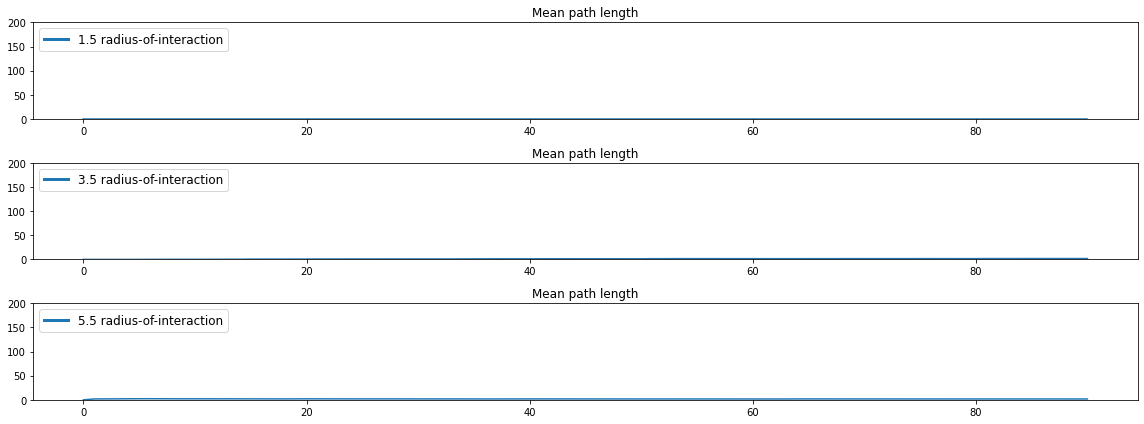

In [32]:
fig, ax = plt.subplots(ncols=1, nrows=3,figsize=(16, 6),gridspec_kw={'height_ratios': [3, 3,3]})
x=0
for i in [1.5,3.5,5.5]:
    x=x+1
    plt.subplot(310+x)
    plt.plot(np.arange(0, df_move.reset_index().loc[df_move.reset_index()['radius-of-interaction']==i].shape[0]),
    df_move.reset_index().loc[df_move.reset_index()['radius-of-interaction']==i]['paths'], label='{} radius-of-interaction'.format(i))
    leg=plt.legend(fontsize=12,loc = "upper left")
    plt.title("Mean path length")
    plt.ylim(0,200)
    for line in leg.get_lines():
        line.set_linewidth(3.0)
    fig.tight_layout()
    plt.ylim(0,200)
plt.show()



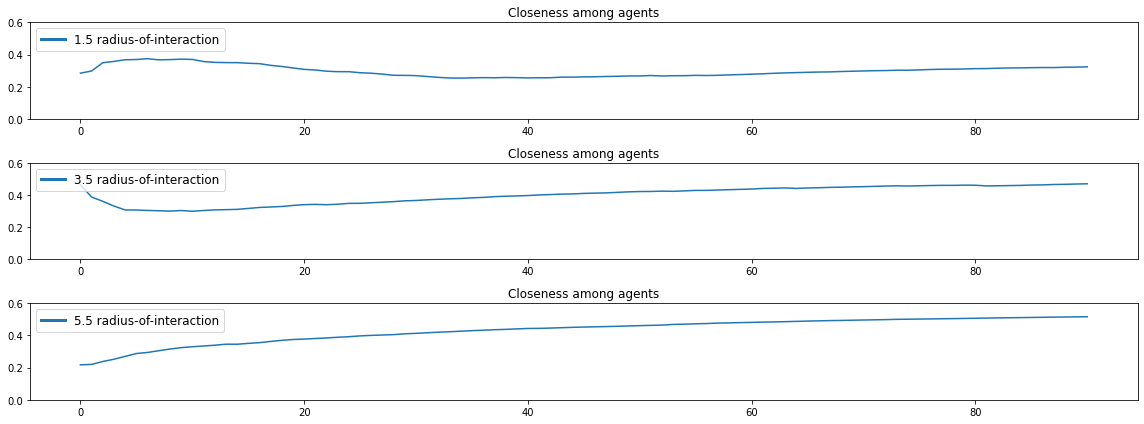

In [33]:
fig, ax = plt.subplots(ncols=1, nrows=3,figsize=(16, 6),gridspec_kw={'height_ratios': [3, 3,3]})
x=0
for i in [1.5,3.5,5.5]:
    x=x+1
    plt.subplot(310+x)
    plt.plot(np.arange(0, df_move.reset_index().loc[df_move.reset_index()['radius-of-interaction']==i].shape[0]),
    df_move.reset_index().loc[df_move.reset_index()['radius-of-interaction']==i]['closeness'], label='{} radius-of-interaction'.format(i))
    leg=plt.legend(fontsize=12,loc = "upper left")
    plt.title("Closeness among agents")
    plt.ylim(0.25,0.6)
    for line in leg.get_lines():
        line.set_linewidth(3.0)
    fig.tight_layout()
    plt.ylim(0,0.6)
plt.show()



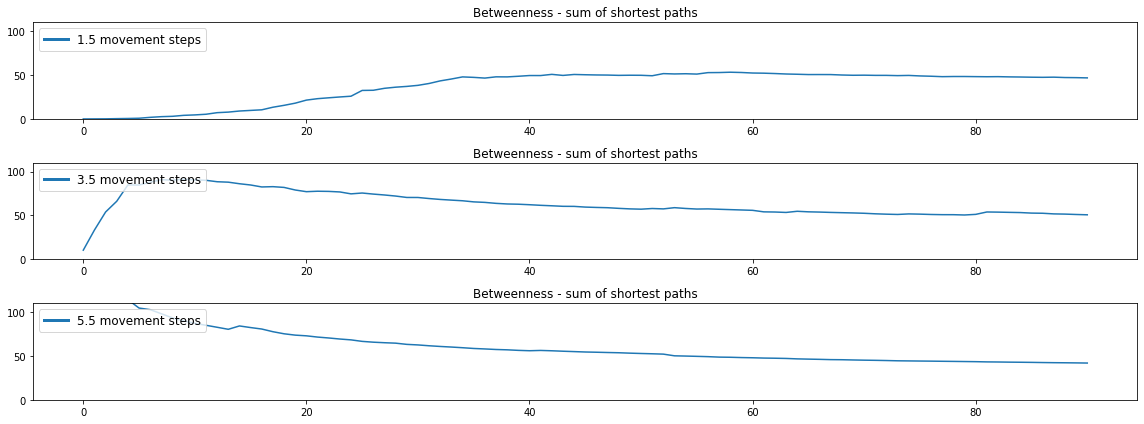

In [34]:
fig, ax = plt.subplots(ncols=1, nrows=3,figsize=(16, 6),gridspec_kw={'height_ratios': [3, 3,3]})
x=0
for i in [1.5,3.5,5.5]:
    x=x+1
    plt.subplot(310+x)
    plt.plot(np.arange(0, df_move.reset_index().loc[df_move.reset_index()['radius-of-interaction']==i].shape[0]),
    df_move.reset_index().loc[df_move.reset_index()['radius-of-interaction']==i]['betweenness'], label='{} movement steps'.format(i))
    leg=plt.legend(fontsize=12,loc = "upper left")
    plt.title("Betweenness - sum of shortest paths")
    for line in leg.get_lines():
        line.set_linewidth(3.0)
    fig.tight_layout()
    plt.ylim(0,110)
plt.show()


In [35]:
mean_start=df_move.reset_index().loc[df_move.reset_index()['radius-of-interaction']==1].mean()
mean_final=df_move.reset_index().loc[df_move.reset_index()['radius-of-interaction']==5].mean()

In [36]:
np.array(mean_final-mean_start)[2:]
pd.set_option('display.precision', 4)



In [37]:
from scipy import stats
t, p =stats.ttest_ind(df_move.reset_index().loc[df_move.reset_index()['radius-of-interaction']==1.5].iloc[:,2:], 
df_move.reset_index().loc[df_move.reset_index()['radius-of-interaction']==5.5].iloc[:,2:])
df_movement=pd.DataFrame([(mean_final-mean_start).index.values[2:],t,p]).T
df_movement.columns=['indicator','t-test','p-value']
df_movement

,indicator,t-test,p-value
0,mood_clients,0.1015,0.9193
1,mood_providers,-1.3606,0.1753
2,cluster_coef,-69.8543,0.0
3,paths,-74.3439,0.0
4,closeness,-15.028,0.0
5,betweenness,-7.9001,0.0
6,centroid-x,27.5518,0.0
7,centroid-y,30.8614,0.0
8,total_mood,-1.3865,0.1673


In [38]:
t, p =stats.f_oneway(df_move.reset_index().loc[df_move.reset_index()['radius-of-interaction']==1.5].iloc[:,2:], 
df_move.reset_index().loc[df_move.reset_index()['radius-of-interaction']==5.5].iloc[:,2:])
df_movement=pd.DataFrame([(mean_final-mean_start).index.values[2:],t,p]).T
df_movement.columns=['indicator','F-test','p-value']
df_movement

,indicator,F-test,p-value
0,mood_clients,0.0103,0.9193
1,mood_providers,1.8512,0.1753
2,cluster_coef,4879.6283,0.0
3,paths,5527.0083,0.0
4,closeness,225.8415,0.0
5,betweenness,62.4114,0.0
6,centroid-x,759.0994,0.0
7,centroid-y,952.4285,0.0
8,total_mood,1.9223,0.1673


In [39]:
## CORRELACAO DE ESTADOS FINAIS COM INICIAIS


df_move1=pd.concat([df_move.reset_index().loc[df_move.reset_index()['radius-of-interaction']==1.5].iloc[0:45,2:],df_move.reset_index().loc[df_move.reset_index()['radius-of-interaction']==1.5].iloc[45:,2:]],axis=1)
df_move1.columns=['mood_clients', 'mood_providers', 'cluster_coef', 'paths', 'closeness',
       'betweenness', 'centroid-x', 'centroid-y', 'total_mood',
       'mood_clients.f', 'mood_providers.f', 'cluster_coef.f', 'paths.f', 'closeness.f',
       'betweenness.f', 'centroid-x.f', 'centroid-y.f', 'total_mood.f']
df_move2=df_move1[['mood_clients', 'mood_providers', 'cluster_coef', 'paths',
       'closeness', 'betweenness', 'total_mood','centroid-x', 'centroid-y']]
df_move3=df_move1[['mood_clients.f', 'mood_providers.f', 'cluster_coef.f', 'paths.f',
       'closeness.f', 'betweenness.f', 'total_mood.f', 'centroid-x.f', 'centroid-y.f']]
df_move3.columns=['mood_clients', 'mood_providers', 'cluster_coef', 'paths',
       'closeness', 'betweenness', 'total_mood','centroid-x', 'centroid-y']
df_move2=df_move2.dropna().reset_index().iloc[:,1:]
df_move3=df_move3.dropna().reset_index().iloc[:,1:]
df_move2.corrwith(df_move3)



mood_clients     -0.5198
mood_providers   -0.3055
cluster_coef      0.9503
paths                NaN
closeness        -0.8977
betweenness      -0.7926
total_mood       -0.0450
centroid-x       -0.6438
centroid-y       -0.0590
dtype: float64

In [40]:
## CORRELACAO DE ESTADOS FINAIS COM INICIAIS


df_move1=pd.concat([df_move.reset_index().loc[df_move.reset_index()['radius-of-interaction']==5.5].iloc[0:45,2:],df_move.reset_index().loc[df_move.reset_index()['radius-of-interaction']==5.5].iloc[45:,2:]],axis=1)
df_move1.columns=['mood_clients', 'mood_providers', 'cluster_coef', 'paths', 'closeness',
       'betweenness', 'centroid-x', 'centroid-y', 'total_mood',
       'mood_clients.f', 'mood_providers.f', 'cluster_coef.f', 'paths.f', 'closeness.f',
       'betweenness.f', 'centroid-x.f', 'centroid-y.f', 'total_mood.f']
df_move2=df_move1[['mood_clients', 'mood_providers', 'cluster_coef', 'paths',
       'closeness', 'betweenness', 'total_mood','centroid-x', 'centroid-y']]
df_move3=df_move1[['mood_clients.f', 'mood_providers.f', 'cluster_coef.f', 'paths.f',
       'closeness.f', 'betweenness.f', 'total_mood.f', 'centroid-x.f', 'centroid-y.f']]
df_move3.columns=['mood_clients', 'mood_providers', 'cluster_coef', 'paths',
       'closeness', 'betweenness', 'total_mood','centroid-x', 'centroid-y']
df_move2=df_move2.dropna().reset_index().iloc[:,1:]
df_move3=df_move3.dropna().reset_index().iloc[:,1:]
df_move2.corrwith(df_move3)




mood_clients     -0.6514
mood_providers   -0.1832
cluster_coef      0.6807
paths            -0.1427
closeness         0.9870
betweenness       0.9500
total_mood        0.0106
centroid-x       -0.0128
centroid-y        0.0689
dtype: float64

In [41]:
df_move.reset_index().loc[df_move.reset_index()['radius-of-interaction']==1.5].iloc[0:30,2:].shape

(30, 9)

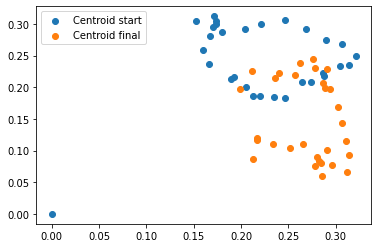

In [42]:
from matplotlib.colors import ListedColormap
classes=['mood_clients', 'mood_providers', 'cluster_coef', 'paths',
       'closeness', 'betweenness', 'centroid-x', 'centroid-y',
       'total_mood']
colors = ['b', 'c', 'y', 'm', 'r']
scatter=plt.scatter(df_move.reset_index().loc[df_move.reset_index()['radius-of-interaction']==1.5].iloc[0:30,2:]['centroid-x'],
df_move.reset_index().loc[df_move.reset_index()['radius-of-interaction']==1.5].iloc[0:30,2:]['centroid-y'],
 cmap=colors[0],label='Centroid start')
plt.legend()
scatter2=plt.scatter(df_move.reset_index().loc[df_move.reset_index()['radius-of-interaction']==1.5].iloc[61:,2:]['centroid-x'],
df_move.reset_index().loc[df_move.reset_index()['radius-of-interaction']==1.5].iloc[61:,2:]['centroid-y'],
 cmap=colors[3],label='Centroid final')
plt.legend()
plt.show()

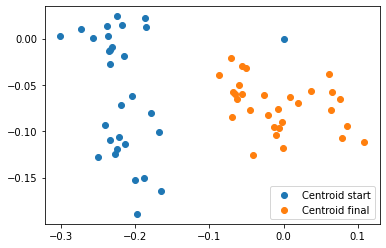

In [43]:
from matplotlib.colors import ListedColormap
classes=['mood_clients', 'mood_providers', 'cluster_coef', 'paths',
       'closeness', 'betweenness', 'centroid-x', 'centroid-y',
       'total_mood']
colors = ['b', 'c', 'y', 'm', 'r']
scatter=plt.scatter(df_move.reset_index().loc[df_move.reset_index()['radius-of-interaction']==5.5].iloc[0:30,2:]['centroid-x'],
df_move.reset_index().loc[df_move.reset_index()['radius-of-interaction']==5.5].iloc[0:30,2:]['centroid-y'],
 cmap=colors[0],label='Centroid start')
plt.legend()
scatter2=plt.scatter(df_move.reset_index().loc[df_move.reset_index()['radius-of-interaction']==5.5].iloc[61:,2:]['centroid-x'],
df_move.reset_index().loc[df_move.reset_index()['radius-of-interaction']==5.5].iloc[61:,2:]['centroid-y'],
 cmap=colors[3],label='Centroid final')
plt.legend()
plt.show()

In [44]:
###### LEMBRAR QUE CADA PONTO E UM CICLO DE INTERACAO, DO VERMELHO PARA O VERDE

df_move

mood_clients  mood_providers  cluster_coef  \
radius-of-interaction step                                               
1.5                   0           2.3546          2.4398        0.0361   
                      1           1.7362          3.1042        0.0503   
                      2           2.1245          3.4144        0.0605   
                      3           2.0676          3.8912        0.0694   
                      4           2.1519          2.5162        0.0814   
...                                  ...             ...           ...   
5.5                   86          2.1810          3.6389        0.7068   
                      87          2.0460          3.8796        0.7069   
                      88          2.1638          2.6921        0.7071   
                      89          1.8971          3.2870        0.7073   
                      90          2.3059          3.6921        0.7080   

                             paths  closeness  betweenness  centroid-x  \
radius-of-interaction step                                               
1.5                   0     0.0000     0.2845       0.0604      0.0000   
                      1     0.0000     0.2982       0.1260      0.1701   
                      2     0.0000     0.3496       0.1806      0.1797   
                      3     0.0000     0.3577       0.4042      0.2037   
                      4     0.0000     0.3680       0.5851      0.2214   
...                            ...        ...          ...         ...   
5.5                   86    1.7056     0.5124      42.4260     -0.0690   
                      87    1.7016     0.5135      42.2639     -0.0458   
                      88    1.6991     0.5142      42.1573     -0.0267   
                      89    1.6957     0.5152      42.0201     -0.0076   
                      90    1.6933     0.5161      41.8542      0.0199   

                            centroid-y  total_mood  
radius-of-interaction step                          
1.5                   0         0.0000      4.7944  
                      1         0.2945      4.8404  
                      2         0.2875      5.5389  
                      3         0.2917      5.9588  
                      4         0.3004      4.6681  
...                                ...         ...  
5.5                   86       -0.0843      5.8199  
                      87       -0.0773      5.9257  
                      88       -0.0610      4.8560  
                      89       -0.0756      5.1841  
                      90       -0.0693      5.9981  

[273 rows x 9 columns]

In [48]:
lag=7

/tmp/ipykernel_248440/788966270.py:46: UserWarning: You passed a edgecolor/edgecolors ('b') for an unfilled marker ('+').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(xx,yy,marker='+',color='black',edgecolors='b',s=90)


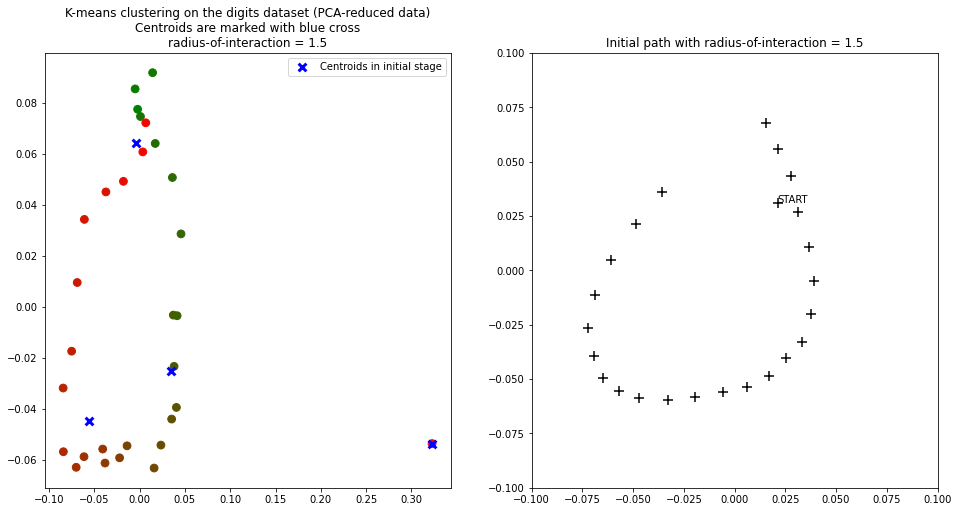

In [78]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

reduced_data = PCA(n_components=2).fit_transform(df_move.reset_index().loc[df_move.reset_index()['radius-of-interaction']==1.5].iloc[0:30,2:][['centroid-x','centroid-y']],
)
kmeans = KMeans(n_clusters=4, n_init=4)
kmeans.fit(reduced_data)
def colorFader(c1,c2,mix=0): #fade (linear interpolate) from color c1 (at mix=0) to c2 (mix=1)
    c1=np.array(mpl.colors.to_rgb(c1))
    c2=np.array(mpl.colors.to_rgb(c2))
    return mpl.colors.to_hex((1-mix)*c1 + mix*c2)


c1='red' #blue
c2='green' #green
n=29
p=[]
for x in range(n+1):
    p.append(colorFader(c1,c2,x/n))
fig, (ax1,ax2) = plt.subplots(ncols=2, nrows=1,figsize=(16, 8))
plt.subplot(1,2,1)

plt.scatter(reduced_data[:, 0], reduced_data[:, 1],color=p,s=60)



centroids = kmeans.cluster_centers_
plt.scatter(
    centroids[:, 0],
    centroids[:, 1],
    marker="x",
    linewidths=3,
    color="blue",s=60, label='Centroids in initial stage'
)
plt.title(
    "K-means clustering on the digits dataset (PCA-reduced data)\n"
    "Centroids are marked with blue cross\n"
    "radius-of-interaction = 1.5"
)
plt.legend()
plt.subplot(1,2,2)
from numpy.lib.stride_tricks import sliding_window_view
xx=np.average(sliding_window_view(reduced_data[:, 0], window_shape = lag), axis=1)
yy=np.average(sliding_window_view(reduced_data[:, 1], window_shape = lag), axis=1)
plt.scatter(xx,yy,marker='+',color='black',edgecolors='b',s=90)
plt.title("Initial path with radius-of-interaction = 1.5")
plt.annotate("START",xy=(xx[0],yy[0]))
plt.ylim(-0.1,0.1)
plt.xlim(-0.1,0.1)

plt.show()

In [50]:
df_move.reset_index().loc[df_move.reset_index()['radius-of-interaction']==1].shape

(0, 11)

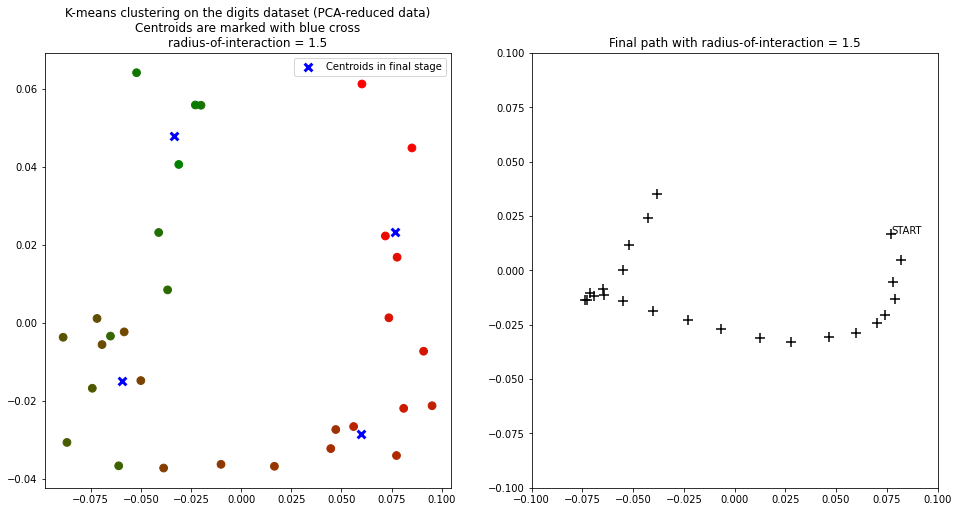

In [76]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

reduced_data = PCA(n_components=2).fit_transform(df_move.reset_index().loc[df_move.reset_index()['radius-of-interaction']==1.5].iloc[61:,2:][['centroid-x','centroid-y']],
)
kmeans = KMeans(n_clusters=4, n_init=4)
kmeans.fit(reduced_data)
def colorFader(c1,c2,mix=0): #fade (linear interpolate) from color c1 (at mix=0) to c2 (mix=1)
    c1=np.array(mpl.colors.to_rgb(c1))
    c2=np.array(mpl.colors.to_rgb(c2))
    return mpl.colors.to_hex((1-mix)*c1 + mix*c2)

c1='red' #blue
c2='green' #green
n=29
p=[]
for x in range(n+1):
    p.append(colorFader(c1,c2,x/n))

fig, (ax1,ax2) = plt.subplots(ncols=2, nrows=1,figsize=(16, 8))
plt.subplot(1,2,1)

plt.scatter(reduced_data[:, 0], reduced_data[:, 1],color=p,s=60)
# Plot the centroids as a white X

centroids = kmeans.cluster_centers_
plt.scatter(
    centroids[:, 0],
    centroids[:, 1],
    marker="x",
    linewidths=3,
    color="blue",s=60, label='Centroids in final stage'
)
plt.title(
    "K-means clustering on the digits dataset (PCA-reduced data)\n"
    "Centroids are marked with blue cross\n"
    "radius-of-interaction = 1.5"
)
plt.legend()
plt.subplot(1,2,2)
from numpy.lib.stride_tricks import sliding_window_view
xx=np.average(sliding_window_view(reduced_data[:, 0], window_shape = lag), axis=1)
yy=np.average(sliding_window_view(reduced_data[:, 1], window_shape = lag), axis=1)
plt.scatter(xx,yy,marker='+',color='black',s=90)
plt.title("Final path with radius-of-interaction = 1.5")
plt.annotate("START",xy=(xx[0],yy[0]))
plt.ylim(-0.1,0.1)
plt.xlim(-0.1,0.1)

plt.show()

In [61]:
reduced_data[0, 0]

0.06018426957769841

/tmp/ipykernel_248440/231173653.py:45: UserWarning: You passed a edgecolor/edgecolors ('b') for an unfilled marker ('+').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(xx,yy,marker='+',color='black',edgecolors='b',s=90)


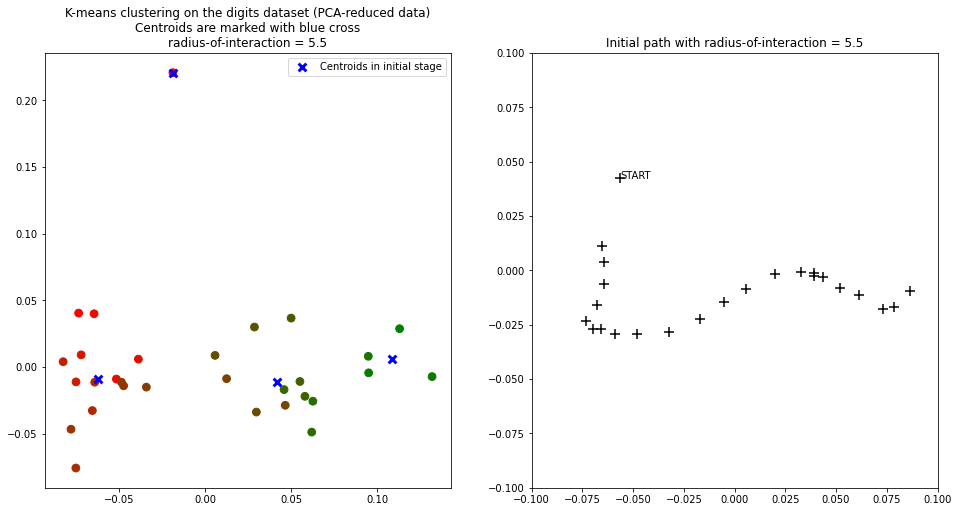

In [75]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

reduced_data = PCA(n_components=2).fit_transform(df_move.reset_index().loc[df_move.reset_index()['radius-of-interaction']==5.5].iloc[0:30,2:][['centroid-x','centroid-y']],
)
kmeans = KMeans(n_clusters=4, n_init=4)
kmeans.fit(reduced_data)
def colorFader(c1,c2,mix=0): #fade (linear interpolate) from color c1 (at mix=0) to c2 (mix=1)
    c1=np.array(mpl.colors.to_rgb(c1))
    c2=np.array(mpl.colors.to_rgb(c2))
    return mpl.colors.to_hex((1-mix)*c1 + mix*c2)

c1='red' #blue
c2='green' #green
n=29
p=[]
for x in range(n+1):
    p.append(colorFader(c1,c2,x/n))

fig, (ax1,ax2) = plt.subplots(ncols=2, nrows=1,figsize=(16, 8))
plt.subplot(1,2,1)

plt.scatter(reduced_data[:, 0], reduced_data[:, 1],color=p,s=60)
# Plot the centroids as a white X
centroids = kmeans.cluster_centers_
plt.scatter(
    centroids[:, 0],
    centroids[:, 1],
    marker="x",
    linewidths=3,
    color="blue",s=60, label='Centroids in initial stage'
)
plt.title(
    "K-means clustering on the digits dataset (PCA-reduced data)\n"
    "Centroids are marked with blue cross\n"
    "radius-of-interaction = 5.5"
)
plt.legend()

plt.subplot(1,2,2)
from numpy.lib.stride_tricks import sliding_window_view
xx=np.average(sliding_window_view(reduced_data[:, 0], window_shape = lag), axis=1)
yy=np.average(sliding_window_view(reduced_data[:, 1], window_shape = lag), axis=1)
plt.scatter(xx,yy,marker='+',color='black',edgecolors='b',s=90)
plt.title("Initial path with radius-of-interaction = 5.5")
plt.annotate("START",xy=(xx[0],yy[0]))
plt.ylim(-0.1,0.1)
plt.xlim(-0.1,0.1)

plt.show()

/tmp/ipykernel_248440/3192106468.py:45: UserWarning: You passed a edgecolor/edgecolors ('b') for an unfilled marker ('+').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(xx,yy,marker='+',color='black',edgecolors='b',s=90)


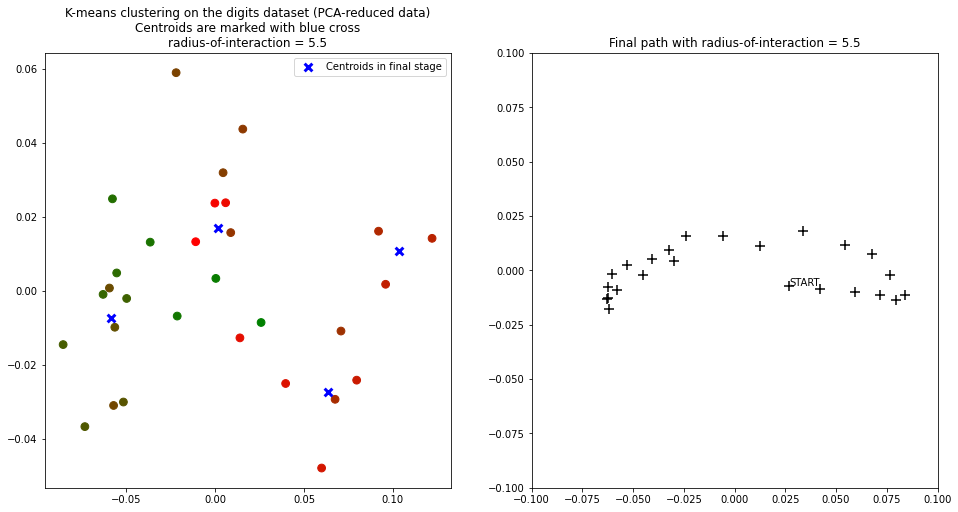

In [77]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

reduced_data = PCA(n_components=2).fit_transform(df_move.reset_index().loc[df_move.reset_index()['radius-of-interaction']==5.5].iloc[61:,2:][['centroid-x','centroid-y']],
)
kmeans = KMeans(n_clusters=4, n_init=4)
kmeans.fit(reduced_data)
def colorFader(c1,c2,mix=0): #fade (linear interpolate) from color c1 (at mix=0) to c2 (mix=1)
    c1=np.array(mpl.colors.to_rgb(c1))
    c2=np.array(mpl.colors.to_rgb(c2))
    return mpl.colors.to_hex((1-mix)*c1 + mix*c2)

c1='red' #blue
c2='green' #green
n=29
p=[]
for x in range(n+1):
    p.append(colorFader(c1,c2,x/n))

fig, (ax1,ax2) = plt.subplots(ncols=2, nrows=1,figsize=(16, 8))
plt.subplot(1,2,1)

plt.scatter(reduced_data[:, 0], reduced_data[:, 1],color=p,s=60)
# Plot the centroids as a white X
centroids = kmeans.cluster_centers_
plt.scatter(
    centroids[:, 0],
    centroids[:, 1],
    marker="x",
    linewidths=3,
    color="blue",s=60, label='Centroids in final stage'
)
plt.title(
    "K-means clustering on the digits dataset (PCA-reduced data)\n"
    "Centroids are marked with blue cross\n"
    "radius-of-interaction = 5.5"
)
plt.legend()

plt.subplot(1,2,2)
from numpy.lib.stride_tricks import sliding_window_view
xx=np.average(sliding_window_view(reduced_data[:, 0], window_shape = lag), axis=1)
yy=np.average(sliding_window_view(reduced_data[:, 1], window_shape = lag), axis=1)
plt.scatter(xx,yy,marker='+',color='black',edgecolors='b',s=90)
plt.title("Final path with radius-of-interaction = 5.5")
plt.annotate("START",xy=(xx[0],yy[0]))
plt.ylim(-0.1,0.1)
plt.xlim(-0.1,0.1)

plt.show()